## Titanic Passenger Prediction

Predicting whether or not a titanic passenger survived.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Train Data

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Some missing values in Age, Cabin, and Embarked columns

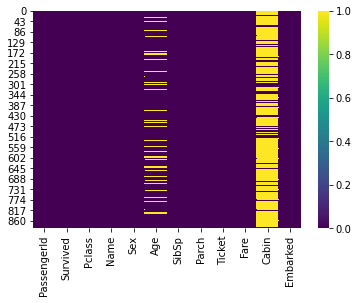

In [5]:
sns.heatmap(train.isnull(), cmap='viridis')

## Exploratory Data Analysis

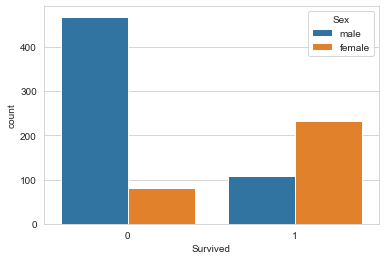

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train, hue='Sex')

#less survivor

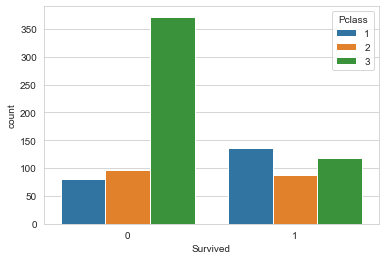

In [7]:
sns.countplot(x='Survived',data=train, hue='Pclass')

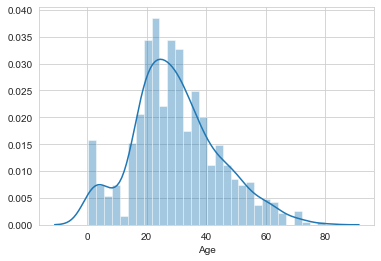

In [8]:
sns.distplot(train['Age'].dropna(), bins=30)

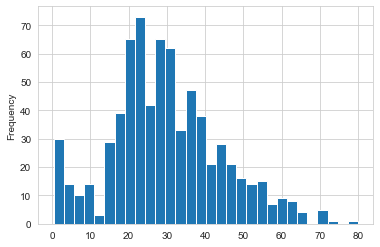

In [9]:
train['Age'].plot.hist(bins=30)

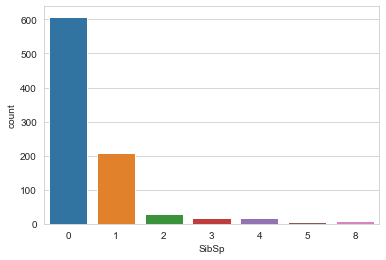

In [10]:
#SibSp = number sibling/spouses on board
sns.countplot(x='SibSp', data=train)

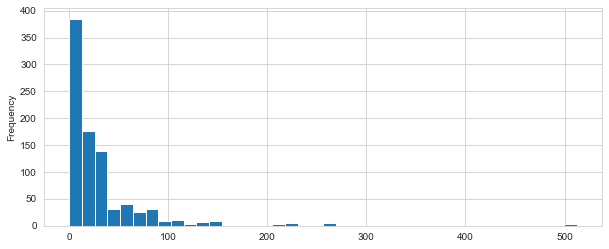

In [11]:
train['Fare'].plot.hist(bins=40, figsize=(10,4))

## Cleaning Data

Drop the Cabin columns since it misses too many values, we probably wouldn't get anything useful from it

In [12]:
train.drop('Cabin', axis=1, inplace=True)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


For Age column, we should impute the age based on average age instead of just dropping it

For Example, I'm going to impute the age based on the average age of each Pclass

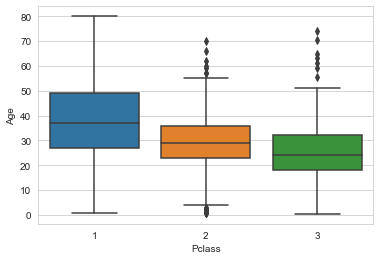

In [14]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [15]:
print('Average age for Pclass=1: ', round(train[train['Pclass']==1]['Age'].mean(), 0))
print('Average age for Pclass=2: ', round(train[train['Pclass']==2]['Age'].mean(), 0))
print('Average age for Pclass=3: ', round(train[train['Pclass']==3]['Age'].mean(), 0))

Average age for Pclass=1:  38.0
Average age for Pclass=2:  30.0
Average age for Pclass=3:  25.0


In [16]:
#make a function to fill the avg age to the null column
def input_age(cols):
    Age= cols[0] 
    Pclass= cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 30
        elif Pclass==3:
            return 25
    else:
        return Age

In [17]:
#apply to the dataframe
train['Age']=train[['Age','Pclass']].apply(input_age,axis=1)
#in this command:
#train['Age'] = cols[0]
#train['Pclass'] = cols [1]

train['Age'].isnull().sum()

0

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


No more missing values in the Age column, now let's drop the missing rows since we only got 2 missing values in embarked column.

In [19]:
train.dropna( inplace=True)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Categorical value have to be converted to numerical value in order for machine learning to be able to read it

For example: Pclass, Sex, and Embarked columns

Use one hot encoder to convert them into numerical values

In [22]:
pclass=pd.get_dummies(train['Pclass'], drop_first=True)

One column is a perfect predictor for both column <br/>
It will become an issue of multicolinearity <br/>
So we drop the first column


In [23]:
pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [24]:
# do the same with the 2 other columns
sex=pd.get_dummies(train['Sex'], drop_first=True)
embarked=pd.get_dummies(train['Embarked'], drop_first=True)

Use concat to concatenate the one hot encoded dataframe into the train dataframe

In [25]:
train=pd.concat([train,pclass,sex,embarked],axis=1)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1,0,1


Drop the PassengerId, Pclass, Name, Sex,  Ticket, and Embarked columns since it won't be any use to the machine learning process.

In [27]:
train.drop(['PassengerId','Pclass','Name','Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [28]:
train.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Age       889 non-null    float64
 2   SibSp     889 non-null    int64  
 3   Parch     889 non-null    int64  
 4   Fare      889 non-null    float64
 5   2         889 non-null    uint8  
 6   3         889 non-null    uint8  
 7   male      889 non-null    uint8  
 8   Q         889 non-null    uint8  
 9   S         889 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 46.0 KB


The dataset is ready to use

## Building a model from the dataset

We're gonna compare some machine learning method to predict whether a passenger survived or not using only train data

Some machine learning used here are: Logistic Regression, Random Forest, KNN, and Naive Bayes

In [30]:
#train_test_split
from sklearn.model_selection import train_test_split

In [31]:
X=train.drop('Survived', axis=1)
y=train['Survived']

Set the test dataset to be 30%

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel=LogisticRegression()

In [35]:
logmodel.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
logpredict=logmodel.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,logpredict))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc=RandomForestClassifier()

In [40]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
rfcpredict=rfc.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,rfcpredict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       163
           1       0.79      0.71      0.75       104

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



### KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

Optimalize the n_neighbors number by error rate

In [44]:
err_rate=[]

for i in range (1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    err_rate.append(np.mean(pred_i != y_test))

([<matplotlib.axis.XTick at 0x2afb29cf5e0>,
 <a list of 49 Text major ticklabel objects>)

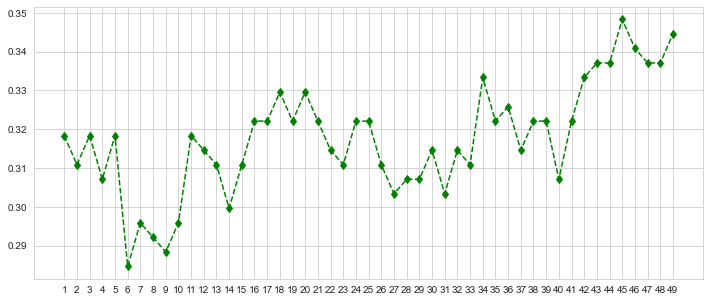

In [45]:
plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
plt.plot(range(1,50),err_rate, color='green', marker='d', ls='--')
plt.xticks(np.arange(1,50,1))

As we can see, the lowest error rate occured when n_neighbors=6

In [46]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [47]:
knnpredict=knn.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,knnpredict))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       163
           1       0.67      0.53      0.59       104

    accuracy                           0.72       267
   macro avg       0.70      0.68      0.69       267
weighted avg       0.71      0.72      0.71       267



### Naive Bayes (Gaussian)

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
gnb=GaussianNB()

In [51]:
gnb.fit(X_train, y_train)

GaussianNB()

In [52]:
gnbpredict=gnb.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,gnbpredict))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.82      0.67      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



The best model could be selected based on the accuracy, precision, and recall value

But I'm also gonna calculate area under ROC curve for selecting the best model for this prediction

### Area Under ROC Curve (AUROC)

In [54]:
lmp=logmodel.predict_proba(X_test) [::,1]
rfcp=rfc.predict_proba(X_test) [::,1]
knnp=knn.predict_proba(X_test) [::,1]
gnbp=gnb.predict_proba(X_test) [::,1]

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

#### Calculate AUROC

In [56]:
lmp_auc=roc_auc_score(y_test,lmp)
rfcp_auc=roc_auc_score(y_test,rfcp)
knnp_auc=roc_auc_score(y_test,knnp)
gnbp_auc=roc_auc_score(y_test,gnbp)

In [57]:
print(lmp_auc)
print(rfcp_auc)
print(knnp_auc)
print(gnbp_auc)

0.8675967437470505
0.8568310523831997
0.7449563473336479
0.8414641340254838


#### Calculate ROC curve

In [58]:
lm_fpr, lm_tpr, _= roc_curve(y_test,lmp)
rfcp_fpr, rfcp_tpr, _= roc_curve(y_test,rfcp)
knnp_fpr, knnp_tpr, _= roc_curve(y_test,knnp)
gnbp_fpr, gnbp_tpr, _= roc_curve(y_test,gnbp)

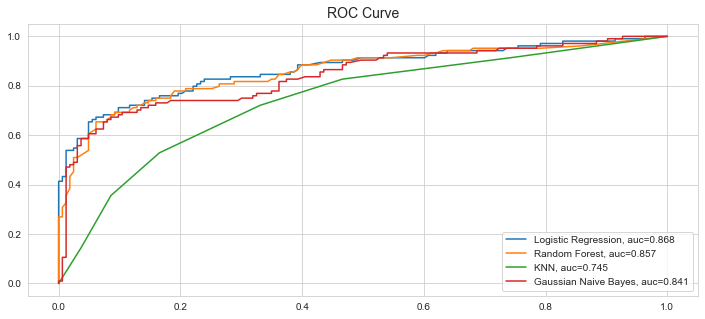

In [59]:
plt.figure(figsize=(12,5))
plt.plot(lm_fpr, lm_tpr, label='Logistic Regression, auc=%0.3f' % lmp_auc)
plt.plot(rfcp_fpr, rfcp_tpr, label='Random Forest, auc=%0.3f' % rfcp_auc)
plt.plot(knnp_fpr, knnp_tpr, label='KNN, auc=%0.3f' % knnp_auc)
plt.plot(gnbp_fpr, gnbp_tpr, label='Gaussian Naive Bayes, auc=%0.3f' % gnbp_auc)
plt.title('ROC Curve', fontsize=14)
plt.legend()

So all in all, <strong>random forest classifier</strong> is the best model compared to the other 3 with accuracy score 80%, precision score 84% and auc score 85.7%

But these scores can be considered unsatisfactory. To fix it, we can do feature engineering or feature selection to tune the model but I will do it in another project.

## Test Dataset

In [60]:
test=pd.read_csv('test.csv')

In [61]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Do the same cleaning as the train dataset

In [63]:
test.drop('Cabin', axis=1, inplace=True)

In [64]:
print('Average age for Pclass=1: ', round(test[test['Pclass']==1]['Age'].mean(), 0))
print('Average age for Pclass=2: ', round(test[test['Pclass']==2]['Age'].mean(), 0))
print('Average age for Pclass=3: ', round(test[test['Pclass']==3]['Age'].mean(), 0))

Average age for Pclass=1:  41.0
Average age for Pclass=2:  29.0
Average age for Pclass=3:  24.0


In [65]:
def input_age(cols):
    Age= cols[0] 
    Pclass= cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 41
        elif Pclass==2:
            return 29
        elif Pclass==3:
            return 24
    else:
        return Age

In [66]:
test['Age']=test[['Age','Pclass']].apply(input_age,axis=1)

In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


Impute the Fare based on average Fare of each class

In [68]:
print('Average age for Pclass=1: ', round(test[test['Pclass']==1]['Fare'].mean(), 2))
print('Average age for Pclass=2: ', round(test[test['Pclass']==2]['Fare'].mean(), 2))
print('Average age for Pclass=3: ', round(test[test['Pclass']==3]['Fare'].mean(), 2))

Average age for Pclass=1:  94.28
Average age for Pclass=2:  22.2
Average age for Pclass=3:  12.46


In [69]:
def input_fare(cols):
    Fare= cols[0] 
    Pclass= cols[1]
    
    if pd.isnull(Fare):
        if Pclass==1:
            return 94.28
        elif Pclass==2:
            return 22.2
        elif Pclass==3:
            return 12.46
    else:
        return Fare

In [70]:
test['Fare']=test[['Fare','Pclass']].apply(input_age,axis=1)

In [71]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


Convert the categorical columns to numerical values using one hot encoder and concat it to the dataframe

In [72]:
pclass=pd.get_dummies(test['Pclass'], drop_first=True)
sex=pd.get_dummies(test['Sex'], drop_first=True)
embarked=pd.get_dummies(test['Embarked'], drop_first=True)

In [73]:
test = pd.concat([test,pclass,sex,embarked], axis=1)

In [74]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,0,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,1,0,0,1


Make a new dataframe and drop the unused columns

In [75]:
test2=test.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'], axis=1)

In [76]:
test2.head()

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0
3,27.0,0,0,8.6625,0,1,1,0,1
4,22.0,1,1,12.2875,0,1,0,0,1


Since we knew that the best method is random forest, then we should predict the test2 dataset using random forest classifier (rfc)

In [77]:
prediction=rfc.predict(test2)

In [78]:
print(prediction)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


Make a new 'Survived' column from in the test dataset

In [79]:
test['Survived']=pd.Series(prediction)

In [80]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1,1,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,1,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,0,1,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1,1,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,1,0,0,1,0


In [81]:
test.drop([2,3,'Q','S','male'], axis=1, inplace=True)

In [82]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S,0


So based on the final test dataset above, we have predicted whether a passenger survived or not, using the random forest classifier.

## Thank You